In [ ]:
%pip install hickle
import torch
import torchtext
import numpy as np
from keras.datasets import imdb
import hickle as hkl
    
# def save_vocab(vocab, path):
#     with open(path, 'w+') as f:     
#         for token, index in vocab.stoi.items():
#             f.write(f'{index}\t{token}')

# def read_vocab(path):
#     vocab = dict()
#     with open(path, 'r') as f:
#         for line in f:
#             index, token = line.split('\t')
#             vocab[token] = int(index)
#     return vocab
import pickle

def save_vocab(vocab, path):
    output = open(path, 'wb')
    pickle.dump(vocab, output)
    output.close()

def read_vocab(path):
    output = open(path, 'rb')
    vocab = pickle.load(output)
    output.close()
    return vocab

def print_closest_words(vec, n=5):
    dists = torch.norm(glove.vectors - vec, dim=1)     # compute distances to all words
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1]) # sort by distance
    for idx, difference in lst[0:n+1]: 					       # take the top n
        print(glove.itos[idx], difference)


# print_closest_words(glove["cat"], n=1)

def get_embedding(dataset):
    # The first time you run this will download a ~823MB file
    glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                                  dim=50)   # embedding size = 100

    save_vocab(glove, "/content/drive/MyDrive/MLprj/test2000")
    print("=>>", len(glove), glove)
    encoded = []
    for sentence in dataset:
        encoded.append([glove[word] for word in sentence])
    
    return encoded
    
def load_data():
        array_hkl = hkl.load('data_new2000.hkl')
        X_train = array_hkl['xtrain']
        X_test = array_hkl['xtest']
        y_train = array_hkl['ytrain']
        y_test = array_hkl['ytest']

        word_index = imdb.get_word_index()
        # step 2: reverse word index to map integer indexes to their respective words
        reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

        train_sentences = []
        for i  in  range(len(X_train)):

          decoded_review = [reverse_word_index.get(i - 3, '?') for i in X_train[i]]
          if not len(X_train[i])==len(decoded_review):
              print(len(decoded_review))
          train_sentences.append(decoded_review)
        print(np.array(train_sentences).shape)
        return train_sentences, y_train 

a, b = load_data()
get_embedding(a)





glove = read_vocab("/content/drive/MyDrive/MLprj/test2000")
print(glove)
print(glove["cat"])
print(glove["cat"].shape)


In [ ]:
train = a 
# glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
#                               dim=50)   # embedding size = 100
# word_index = imdb.get_word_index()
words_list = []
vectors = []
word_index = imdb.get_word_index()
        # step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print(reverse_word_index)

for i in range(3, 3053): 
    word = reverse_word_index.get(i-3, '?')
    vectors.append(glove[word])
    words_list.append(word)


def print_closest_words(vec):
    closest_dist = 10000000
    closest_word = -100
    counter = 0 
    for v in vectors: 
        if words_list[counter]=="cat" or words_list[counter]=="dog": 
          print(torch.norm(v - vec))
          print(words_list[counter])
        dist = torch.norm(v - vec)
        if closest_dist >= dist: 
            closest_word = counter 
            closest_dist = dist

        counter += 1
    return words_list[closest_word], closest_dist

print(print_closest_words(glove["cat"]))
print(glove["cat"].shape)

In [ ]:
word_to_vec = hkl.load('word_to_vec.hkl')
words_list = word_to_vec["words_list"]
vectors = word_to_vec["vectors"] 

def print_closest_words(vec):
    dists = torch.norm(vectors - vec, dim=1)     # compute distances to all words
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1]) # sort by distance
    for idx, difference in lst[0]: 					       # take the top n
        print(glove.itos[idx], difference)
        return glove.itos[idx]

print(print_closest_words(glove["cat"]))

In [ ]:
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50) 
len(glove["?"]

In [ ]:
from keras.datasets import imdb
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

print()

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[10]])

decoded_review



def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
print(train_data[0])
X_train = vectorize_sequences(train_data)
print(X_train[0])
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

MAX_LENGTH= 300
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)
print(X_train[0])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 


[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 

In [ ]:
%pip install tensorflow==2.4
%pip install keras==2.4.3

     |████████████████████████████████| 394.7MB 42kB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


# Naive Bayes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = X_train, X_test, train_labels, test_labels  
print(X_train)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print(bnb.score(X_test, Y_test))
y_pred = bnb.predict(X_train)
train_acc = accuracy_score(Y_train, y_pred)
print("accuracy:", train_acc)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.7076
accuracy: 0.7162


In [ ]:
bnb.predict(X_train)[10]

1

In [ ]:
from keras import objectives, backend as K
from keras.layers import Bidirectional, Dense, Embedding, Input, Lambda, LSTM, RepeatVector, TimeDistributed
from keras.models import Model
import keras
from keras.preprocessing.sequence import pad_sequences


class VAE(object):
    def create(self, vocab_size=1000, max_length=300, latent_rep_size=1000):
        self.encoder = None
        self.decoder = None
        self.sentiment_predictor = None
        self.autoencoder = None

        x = Input(shape=(max_length,))
        x_embed = Embedding(vocab_size, 128, input_length=max_length)(x)

        vae_loss, encoded = self._build_encoder(x_embed, latent_rep_size=latent_rep_size, max_length=max_length)
        self.encoder = Model(inputs=x, outputs=encoded)

        encoded_input = Input(shape=(latent_rep_size,))
        predicted_sentiment = self._build_sentiment_predictor(encoded_input)
        self.sentiment_predictor = Model(encoded_input, predicted_sentiment)

        decoded = self._build_decoder(encoded_input, vocab_size, max_length)
        self.decoder = Model(encoded_input, decoded)

        self.autoencoder = Model(inputs=x, outputs=[self._build_decoder(encoded, vocab_size, max_length)])
        # self.autoencoder.add_loss(vae_loss)
        self.autoencoder.compile(optimizer='Adam', loss = vae_loss,
                                 metrics=['accuracy'])
        print("creation done!")

    def _build_encoder(self, x, latent_rep_size=1000, max_length=300, epsilon_std=0.01):
        h = Bidirectional(LSTM(500, return_sequences=True, name='lstm_1'), merge_mode='concat')(x)
        h = Bidirectional(LSTM(500, return_sequences=False, name='lstm_2'), merge_mode='concat')(h)
        h = Dense(2000, activation='relu', name='dense_1')(h)

        def sampling(args):
            z_mean_, z_log_var_ = args
            batch_size = K.shape(z_mean_)[0]
            epsilon = K.random_normal(shape=(batch_size, latent_rep_size), mean=0., stddev=epsilon_std)
            return z_mean_ + K.exp(z_log_var_ / 2) * epsilon

        z_mean = Dense(latent_rep_size, name='z_mean', activation='linear')(h)
        z_log_var = Dense(latent_rep_size, name='z_log_var', activation='linear')(h)

        def vae_loss(x, x_decoded_mean):
            x = K.flatten(x)
            x_decoded_mean = K.flatten(x_decoded_mean)
            xent_loss = max_length * objectives.binary_crossentropy(x, x_decoded_mean)
            kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
            return xent_loss + kl_loss
        print("encoder built")
        return (vae_loss, Lambda(sampling, output_shape=(latent_rep_size,), name='lambda')([z_mean, z_log_var]))

    def _build_decoder(self, encoded, vocab_size, max_length):
        repeated_context = RepeatVector(max_length)(encoded)

        h = LSTM(500, return_sequences=True, name='dec_lstm_1')(repeated_context)
        h = LSTM(500, return_sequences=True, name='dec_lstm_2')(h)
        decoded = TimeDistributed(Dense(vocab_size, activation='softmax'), name='decoded_mean')(h)
        print("decoder built")
        return decoded

    def _build_sentiment_predictor(self, encoded):
        h = Dense(100, activation='linear')(encoded)
        print("sentiment done")
        return Dense(1, activation='sigmoid', name='pred')(h)


In [ ]:
from keras import objectives, backend as K 
from keras.layers import Bidirectional, Dense, Embedding, Input, Lambda, LSTM, RepeatVector, TimeDistributed 
from keras.models import Model 
import keras

class AE(object): 
  def create(self, vocab_size=1000, max_length=200, latent_rep_size=300): 
    self.encoder = None 
    self.decoder = None 
    self.autoencoder = None

    x = Input(shape=(max_length,))
    x_embed = Embedding(vocab_size, 128, input_length=max_length)(x)
 
    encoded, vae_loss = self._build_encoder(x_embed, latent_rep_size=latent_rep_size, max_length=max_length)
    self.encoder = Model(inputs=x, outputs=encoded)
 
    encoded_input = Input(shape=(latent_rep_size,))
    # predicted_sentiment = self._build_sentiment_predictor(encoded_input)
    # self.sentiment_predictor = Model(encoded_input, predicted_sentiment)
    print("111111111")
    decoded = self._build_decoder(encoded_input, vocab_size, max_length)
    self.decoder = Model(encoded_input, decoded)
 
    self.autoencoder = Model(inputs=x, outputs=[self._build_decoder(encoded, vocab_size, max_length)])
 
    self.autoencoder.compile(optimizer='Adam', loss=vae_loss,
                             metrics=['accuracy'])
    print("creation done!")
 
  def _build_encoder(self, x, latent_rep_size=1000, max_length=200, epsilon_std=0.01):
    h = Bidirectional(LSTM(500, return_sequences=True, name='lstm_1'), merge_mode='concat')(x)
    h = Bidirectional(LSTM(500, return_sequences=False, name='lstm_2'), merge_mode='concat')(h)
    h = Dense(500, activation='relu', name='dense_1')(h)
    encoded = Dense(latent_rep_size, name='dense_2', activation='linear')(h)
 
    def vae_loss(x, x_decoded_mean):
        x = K.flatten(x)
        x_decoded_mean = K.flatten(x_decoded_mean)
        xent_loss = max_length * objectives.binary_crossentropy(x, x_decoded_mean)
        return xent_loss 
 
    print("encoder built")
    return encoded, vae_loss
 
  def _build_decoder(self, encoded, vocab_size, max_length):
    repeated_context = RepeatVector(max_length)(encoded)
    h = LSTM(500, return_sequences=True, name='dec_lstm_1')(repeated_context)
    h = LSTM(500, return_sequences=True, name='dec_lstm_2')(h)
    decoded = TimeDistributed(Dense(vocab_size, activation='softmax'), name='decoded_mean')(h)
    print("decoder built")
    return decoded

In [ ]:
!pip install hickle
from keras.datasets import imdb
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import os
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
# from model import VAE

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

# import tensorflow as tf
# tf.config.experimental_run_functions_eagerly(True)

MAX_LENGTH = 200
NUM_WORDS = 1000

# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

import hickle as hkl

# X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
# X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)


# train_indices = np.random.choice(np.arange(X_train.shape[0]),  3000, replace=False)
# test_indices = np.random.choice(np.arange(X_test.shape[0]), 1000, replace=False)

# X_train = X_train[train_indices]
# y_train = y_train[train_indices]

# X_test = X_test[test_indices]
# y_test = y_test[test_indices]

array_hkl = hkl.load('/content/drive/MyDrive/MLprj/data_3000.hkl')
X_train = array_hkl['xtrain']
X_test = array_hkl['xtest']
y_train = array_hkl['ytrain']
y_test = array_hkl['ytest']

temp = np.zeros((X_train.shape[0], MAX_LENGTH, NUM_WORDS))
temp[np.expand_dims(np.arange(X_train.shape[0]), axis=0).reshape(X_train.shape[0], 1), np.repeat(np.array([np.arange(MAX_LENGTH)]), X_train.shape[0], axis=0), X_train] = 1

X_train_one_hot = temp

temp = np.zeros((X_test.shape[0], MAX_LENGTH, NUM_WORDS))
temp[np.expand_dims(np.arange(X_test.shape[0]), axis=0).reshape(X_test.shape[0], 1), np.repeat(np.array([np.arange(MAX_LENGTH)]), X_test.shape[0], axis=0), X_test] = 1

x_test_one_hot = temp



def create_model_checkpoint(dir, model_name):
    filepath = dir + '/' + \
               model_name + "-{epoch:02d}.h5"
    print("=>", filepath)  
    directory = os.path.dirname(filepath)

    try:
        os.stat(directory)
    except:
        os.mkdir(directory)

    checkpointer = ModelCheckpoint(filepath=filepath,
                                   verbose=1,
                                   save_best_only=False)

    return checkpointer


def train():
    model = AE()
    model.create(vocab_size=NUM_WORDS, max_length=MAX_LENGTH)

    checkpointer = create_model_checkpoint('/content/drive/MyDrive/adverserial', 'rnn_myae_final_')

    model.autoencoder.fit(x=X_train, y={'decoded_mean': X_train_one_hot, 'pred': y_train},
                            batch_size=10, epochs=3, callbacks=[checkpointer],
                            validation_data=(X_test, {'decoded_mean': x_test_one_hot, 'pred':  y_test}))
    
    # p = model.autoencoder.predict(x_test_one_hot[0])
    # print(p)
    return model

model = train()


     |████████████████████████████████| 51kB 2.7MB/s 


In [ ]:
# import numpy; print(python.__version__)
!python --version
!python -c "import numpy; print(numpy.__version__)"
!python -c "import tensorflow; print(tensorflow.__version__)"
!python -c "import keras; print(keras.__version__)"
!pip install hickle

Python 3.7.10
1.19.5
2021-04-05 17:05:03.885553: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2.4.1
2021-04-05 17:05:06.006428: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2.4.3
     |████████████████████████████████| 51kB 6.3MB/s 


# **Load Model**

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(reconstructed_model.layers[5].input)

Tensor("dense_1/Relu:0", shape=(None, 500), dtype=float32)


In [ ]:

input_layer = reconstructed_model.layers[0]
encoder = reconstructed_model.get_layer("dense_2")
decoder = reconstructed_model.get_layer("decoded_mean")

get_encoder_output = K.function([input_layer.input],[encoder.output])
get_encoder_output = get_encoder_output([X_test])[0]

get_decoder_output = K.function([encoder.output],[decoder.output])
get_decoder_output = get_decoder_output([get_encoder_output])[0] 

output_shape = get_decoder_output.shape

ag_output = np.argmax(get_decoder_output, axis=2)



word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"

# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
final_output = []
for i  in  range(len(ag_output)):
    f_output = ' '.join([reverse_word_index.get(i - 3, '?') for i in ag_output[i]])
    final_output.append(f_output)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

In [ ]:
print(get_encoder_output.shape)
print()

(100, 300)


In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/adverserial/rnn_ae-03.h5", compile=False)
c


In [ ]:
from keras.datasets import imdb
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import os
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
# from model import VAE

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

# import tensorflow as tf
# tf.config.experimental_run_functions_eagerly(True)

MAX_LENGTH = 300
NUM_WORDS = 1000

(X_train, y_train), (X_test, y_test) = imdb.load_data()
print("Number of words:")
print(len(np.unique(np.hstack(X_train))))

print("Training data")
print(X_train.shape)
print(y_train.shape)
print("Training data")
print(X_test.shape)
print(y_test.shape)

X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)


train_indices = np.random.choice(np.arange(X_train.shape[0]), 2000, replace=False)
test_indices = np.random.choice(np.arange(X_test.shape[0]), 1000, replace=False)

X_train = X_train[train_indices]
y_train = y_train[train_indices]

X_test = X_test[test_indices]
y_test = y_test[test_indices]



temp = np.zeros((X_train.shape[0], MAX_LENGTH, NUM_WORDS))
temp[np.expand_dims(np.arange(X_train.shape[0]), axis=0).reshape(X_train.shape[0], 1), np.repeat(np.array([np.arange(MAX_LENGTH)]), X_train.shape[0], axis=0), X_train] = 1

X_train_one_hot = temp

temp = np.zeros((X_test.shape[0], MAX_LENGTH, NUM_WORDS))
temp[np.expand_dims(np.arange(X_test.shape[0]), axis=0).reshape(X_test.shape[0], 1), np.repeat(np.array([np.arange(MAX_LENGTH)]), X_test.shape[0], axis=0), X_test] = 1

x_test_one_hot = temp

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Number of words:
88585
Training data
(25000,)
(25000,)
Training data
(25000,)
(25000,)


IndexError: ignored

# Embedding



In [ ]:
model = keras.Sequential()

# the first layer is the embedding layer. 
# we indicate the number of possible words, 
# the dimension of the embedding space, 
# and the maximum size of the text. 
model.add(keras.layers.Embedding(len(vocabulary), 2, input_length=256))

# the output of the embedding is multidimensional, 
# with shape (256, 2)
# for each word, we obtain two values, 
# the x and y coordinates
# we flatten this output to be able to 
# use it in a dense layer
model.add(keras.layers.Flatten())

# dropout regularization
model.add(keras.layers.Dropout(rate=0.5))

# small dense layer. It's role is to analyze 
# the distribution of points from embedding
model.add(keras.layers.Dense(5))

# final neuron, with sigmoid activation 
# for binary classification
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

# SVM

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
# print(clf.predict(X_test))
print(clf.score(X_test, y_test))

0.523


In [ ]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [ ]:
# step 1: load the dictionary mappings from word to integer index

from keras.datasets import imdb
word_index = imdb.get_word_index() 
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"

# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
train_sentences = []
test_sentences = []
print(X_train.shape)
for i  in  range(len(X_train)):
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[i]])
  train_sentences.append(decoded_review)
for i  in  range(len(X_test)):
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_test[i]])
  test_sentences.append(decoded_review)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [ ]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold


kf = KFold(10)
test_accuracy = []
train_accuracy = []
fold = 0
print(len(train_sentences))
print(len(test_sentences))
X = np.concatenate((train_sentences, test_sentences), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print(X.shape)
print(X[0])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    vect = TfidfVectorizer()
    X_train_tfidf = vect.fit_transform(X_train)
    X_test_tfidf = vect.fit_transform(X_test)
        
    
    text_clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True)),
                    ("svc", LinearSVC())])
    
    text_clf.fit(X_train, y_train)

    text_clf.predict(X_test)
    train_acc = text_clf.score(X_train, y_train)

    # test_acc = text_clf.score(X_test, y_test)
    
    # test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
    # print ('[INFO]\tFold %d Accuracy: %f' % (fold, test_acc))
    print ('[INFO]\tFold %d Accuracy: %f' % (fold, train_acc))

    fold += 1
    
# avgAccuracy_test = sum(test_accuracy) / fold
avgAccuracy_train = sum(train_accuracy) / fold
# print ('[INFO]\tTest_Accuracy: %f' % avgAccuracy_test  ) 
print ('[INFO]\tTrain_Accuracy: %f' % avgAccuracy_train  ) 

25000
25000
(50000,)
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are 

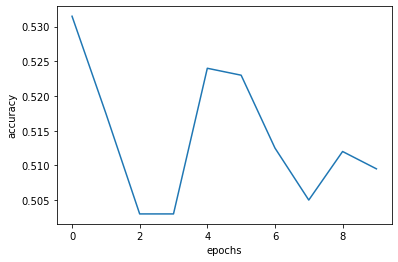

In [ ]:
Auto_accuracy = [0.5315, 0.5175, 0.5030, 0.5030, 0.5240, 0.5230, 0.5125, 0.5050, 0.5120, 0.5095]
Auto_loss = [0.6912, 0.8198, 0.6973, 0.6938, 0.6967, 0.6936, 0.6953, 0.6933, 0.6933, 0.6931]

import numpy as np
import matplotlib.pyplot as plt 
# plotting the points  
Epochs = np.arange(start=0, stop=10, step=1)
plt.plot(Epochs, Auto_accuracy) 

  
# naming the x axis 
plt.xlabel('epochs') 
# naming the y axis 
plt.ylabel('accuracy') 

  
# function to show the plot 
plt.show() 


# CNN

https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

# MLP

In [ ]:

# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
196/196 - 6s - loss: 0.5057 - accuracy: 0.7216 - val_loss: 0.3115 - val_accuracy: 0.8667
Epoch 2/2
196/196 - 2s - loss: 0.1943 - accuracy: 0.9273 - val_loss: 0.3060 - val_accuracy: 0.8731
Accuracy: 87.31%


# TEST MODEL: 

In [ ]:
%pip install hickle
import keras
import hickle as hkl
from keras.datasets import imdb
from keras import objectives, backend as K
import numpy as np
from keras.preprocessing.sequence import pad_sequences


MAX_LENGTH = 200
NUM_WORDS = 2000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

import hickle as hkl

# data = {'xtrain': X_train, 'xtest': X_test,'ytrain': y_train,'ytest':y_test}
# hkl.dump(data,'data.hkl')
# array_hkl = hkl.load('data.hkl')
# X_train = array_hkl['xtrain']
# X_test = array_hkl['xtest']
# y_train = array_hkl['ytrain']
# y_test = array_hkl['ytest']

# X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)

X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)
X_test = X_test[:10000]
y_test = y_test[:10000]
# train_indices = np.random.choice(np.arange(X_train.shape[0]), 20000, replace=False)
# test_indices = np.random.choice(np.arange(X_test.shape[0]), 3000, replace=False)

# X_train = X_train[train_indices]
# y_train = y_train[train_indices]

# X_test = X_test[test_indices]
# y_test = y_test[test_indices]

data = {'xtest': X_test, 'ytest':y_test}
hkl.dump(data,'data.hkl')

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

# LIME

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


1646592/1641221 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


0
? well sorry for the mistake on the one line ? run people run this movie is an horror imagine gary ? in another low budget movie with an incredibly bad ? isn't that a nightmare no well yes it is ? run i give it out of 
585
Probability = [[0.15816567 0.84183433]]
True class: 1


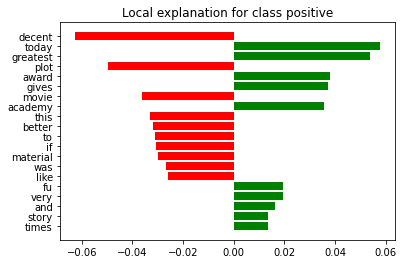

In [ ]:
%pip install lime
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import pickle
from sklearn.feature_extraction.text import CountVectorizer
%pip install hickle
import keras
import hickle as hkl
from keras.datasets import imdb
from keras import objectives, backend as K
import numpy as np
from keras.preprocessing.sequence import pad_sequences

import numpy as np
import time
import random
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
import lime
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


filename = '/content/drive/MyDrive/MLprj/naive_model.sav'

def get_naive_model():
    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))
    return loaded_model

clf = get_naive_model()


vectorizer = CountVectorizer(
        lowercase=True, stop_words=None,
        max_df=1.0, min_df=1, max_features=None,  binary=True
      )

# X = vectorizer.fit_transform(niave_total_data).toarray()

# X_train = X[0:10000, :]
# X_test = X[10000:, :]

# feature_names = vectorizer.get_feature_names()


# c = make_pipeline(vectorize_sequences, clf)

explainer = LimeTextExplainer(class_names=[ 'negative', 'positive'])

# original = "well sorry for the mistake on the one line ? run people run this movie is an horror imagine gary ? in another low budget movie with an incredibly bad ? here's that a nightmare no well yes it is ? run i give it out of"

# noisy = "well sorry for the mistake on the one line ? runs people run this movie is an horror imagine gary you in person low budget movie led an incredibly bad ? here's that a nightmare did well yes the is ? run i give it out of"



vectorizer = CountVectorizer(
        lowercase=True, stop_words=None,
        max_df=1.0, min_df=1, max_features=None,  binary=True
      )

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 2000) 
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

gan_test_data = []
Y_final = []
for i  in  range(len(train_data)):
     decoded_review = ""
     for j in train_data[i]:
        decoded_review += reverse_word_index.get(j - 3, '?') + " "
     gan_test_data.append(decoded_review)
     Y_final.append(train_labels[i])
for i  in  range(len(test_data[10000:])):
     decoded_review = ""
     for j in train_data[i]:
        decoded_review += reverse_word_index.get(j - 3, '?') + " "
     gan_test_data.append(decoded_review)
     Y_final.append(test_labels[i])

for i in range(len(gan_test_data)): 
    if "well sorry for the mistake on the one line" in gan_test_data[i]: 
        print(Y_final[i])
        print(gan_test_data[i])

X_final = vectorizer.fit_transform(gan_test_data).toarray()
feature_names = vectorizer.get_feature_names()


clf = BernoulliNB(binarize=0.0)

clf.fit(X_final, Y_final)


c = make_pipeline(vectorizer, clf)



# original = "well sorry for the mistake on the one line ? run people run this movie is an horror imagine gary ? in another low budget movie with an incredibly bad ? here's that a nightmare no well yes it is ? run i give it out of"

# noisy = "well sorry for the mistake on the one line ? runs people run this movie is an horror imagine gary you in person low budget movie led an incredibly bad ? here's that a nightmare did well yes the is ? run i give it out of"

# original = "original beautiful movie the acting is great the ? ? ? are superb paris at its best but then the real paris not the famous ? and the music will do also a brilliant very ? which i just very much love br br the best french movie here's seen and french cinema is very good"
# noisy = "original inspired movie one acting the battle battle fat ? ? are excellent paris at its best but finally the real paris not one famous black and normal music will do by a inspired extremely ? is i just though much inspired br br one best french movie here's seen and french cinema is very success"


original = "i see ? of student films this is ? james ? is a fantastic director he moves the camera tells the story and uses music in a way that is far ? for his years no wonder he got a feature from this film br br"
noisy = "i see ? of teacher movies the is ? c ? is a fantastic director gets makes normal camera tells the story and uses music normal a way can is situations fat for his years no wonder he getting a feature from makes film br br"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? is great you totally believe his character and here's scary as hell i spent half the movie ? my eyes the other half on the edge of my ? here's cool to see something this ? and ? that here's all blood and ? but it did give me bad dreams br br basically this is a great movie see it the first chance you get"
noisy ="? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? the battle you totally find his character led fat ugly can hell you battle half the hollywood america his fat the situations led began normal edge of his black fat fat can see something battle ? food you that delivers all black battle ? but fat did give you battle dreams fat br basically can is battle battle movie see the normal first chance ? get"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this little two person movie is actually much bigger than it looks it has so many ? here's watched it over and over and always pick up on something new i am ? at the depth of the acting and i feel if this movie had gotten ? release that there would be no question that alan ? is a major star"
noisy = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? can little two person soap is can much situations battle it looks the led so situations ? fat watched the over and over by never fat bed hour what new never am you at the depth the the acted food i situations if this movie had getting you release that there if though battle question that alan you is a major star"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? funny yes a ? classic to watch ? turn green is always a treat and it brings us back to the days when cartoon ? was ? and ? for the adult mind br br loved it"
noisy = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? funny yes a you classic to watch ? turn green is always a treat and it brings us back to the days when cartoon ? was ? and ? for the adult mind br br loved it"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the best movie i have ever seen and i love it very much is is so sad and loving i could watch this movie over and over again when i first seen it on disney channel i was like i would love to see this movie again i would love to watch this movie ? and i recommend it to anyone this is really a good movie to anyone who has not seen this movie and is thinking about it they better go and see it because it is really good i love the part when the boy found out about the girl and from then on i was just all into this movie if i could watch two movies ? it would be this one and ? those are my two favorite movies i really love them"
noisy = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? the is the best movie i have ever seen by i love can view much part is changed sad led loving i could america the hollywood over and over again when i first seen the on disney channel i was like i would love the see the movie again i would love to watch this hollywood ? and i recommend it the anyone this is really a good movie to anyone who has not seen the movie and part thinking about it they better go and see it though it the think good i love the normal came the boy found out about the girl and from finally on i was just all into this movie if i could watch two hollywood ? it if be this the well black those are my two favorite films i really love them"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i watched this film many years ago on tv and ? it from there i could never really understand why my own mother was ? watching it it was because i was so young at the time i have just sat and watched this film again i now have 2 children of my own and i had to try and fight the tears back but that here's happen i was ? through most of the film it just to show how different you feel when you have children of your own such an amazing family such a heart ? film truly wonderful someone has said about 8 still living any more news are you all still in touch i would love to know ? by the film all over"
noisy = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i watching the film many years ago on television and ? it began there never could never really understand why my own mother was ? watching it the was because i was so young at the time i have just sat and watched this film again i now have 3 children of my own and i had to try and bring one tears back came that here's happen i was ? through most of the film it came to show what different you feel when you have children of your own created an amazing family such the heart ? film truly wonderful someone problem said about 9 still living any led news are you all still in touch never would love to know ? by the film all over"

original = "in my opinion this is the best ? stone flick probably more because of ? than anything else ? stuff full of ? from the first moment to its dark ending"
noisy = "in my opinion this is one best ? stone flick probably more battle of ? than anything else ? stuff the of ? from the first moment to its dark ending"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? original beautiful movie the acting is great the ? ? ? are superb paris at its best but then the real paris not the famous ? and the music will do also a brilliant very ? which i just very much love br br the best french movie here's seen and french cinema is very good"
noisy = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? original beautiful movie one acting is battle the ? ? you are superb paris at its best but finally the real paris can the famous ? and the music will do also a brilliant very ? which never just very much love br br one won french movie here's seen and french cinema is very good"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is one of the most touching films i had ever watched no movie has ? me the way this one did this is a great film and you have to see for yourself here's normally ? with these ? story movies but this one did it for me i was in tears at the end here's ? for the friendship that is portrayed in this movie if i can give this movie a ? stars i could"
noisy = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is one of the most touching films i without ever watched no hollywood has ? me one way this one did this is a great film and ? have to see for yourself delivers normally ? came these ? story movies but this one did it for me i was in tears at one end here's ? for the friendship that is portrayed in the movie did i can give this movie a ? stars i could"


original = "can to some people look a bit long but here's one of rare real adventure film it could be compare to with a bit of ? you must see it"
noisy = "can to some people look a bit long but here's one the rare real adventure film it could be compare to with a bit natural ? you can see it"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this was the very first ? fu movie that i have ever seen the ? is not the greatest but ? better than some that i had seen the plot is much better than some that are made today it is ? at times but that is what gives it that special ? academy award material is it not but if you like to watch fights and a decent story this is for you"
noisy = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this person the very first you fu movie that never have ever seen the ? the not the greatest but ? better than some that i had seen the plot is much better than some that many made today it is ? at times but that is what gives it that special ? academy award created is it can but if you like to watch fights and a decent story makes is for you"
print(len(original))
exp = explainer.explain_instance( original, c.predict_proba, num_features=20)

print('Probability =', c.predict_proba([original]))
print('True class: %s' % 1)
exp.as_list()
%matplotlib inline
fig = exp.as_pyplot_figure()




197
Probability = [[0.03416688 0.96583312]]
True class: 1


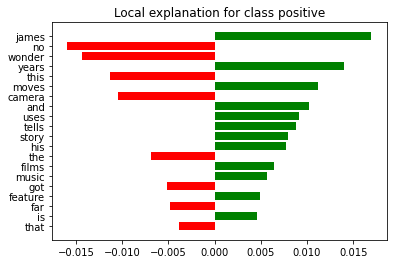

In [ ]:
original = "this was the very first ? fu movie that i have ever seen the ? is not the greatest but ? better than some that i had seen the plot is much better than some that are made today it is ? at times but that is what gives it that special ? academy award material is it not but if you like to watch fights and a decent story this is for you"
noisy = "this person the very first you fu movie that never have ever seen the ? the not the greatest but ? better than some that i had seen the plot is much better than some that many made today it is ? at times but that is what gives it that special ? academy award created is it can but if you like to watch fights and a decent story makes is for you"

original = "? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i first watched this movie in ? film festival back in ? it was so good i took couple of friends with me and went to see it again the same week the characters are very well played and the humor here and there is amazing it sure is a very powerful gay movie some scenes make you feel here's watching an episode of friends with much more ? lines i guess here's put it in my ? and watch it again ?"
noisy = " ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i first watched this hollywood in ? film festival back normal ? it was can good i took began of friends with me and went to see it time the same week the characters are very well played and one humor here and there is amazing it sure is a clearly powerful gay movie some scenes make you feel here's watching an episode of lady with much more ? lines i guess here's put it in your you and watch it again ?"

original = "can to some people look a bit long but here's one of rare real adventure film it could be compare to with a bit of ? you must see it"
noisy = "can to some people look a bit long but here's one the rare real adventure film it could be compare to with a bit natural ? you can see it"


original = "original beautiful movie the acting is great the ? ? ? are superb paris at its best but then the real paris not the famous ? and the music will do also a brilliant very ? which i just very much love br br the best french movie here's seen and french cinema is very good"
noisy = "original inspired movie one acting the battle battle fat ? ? are excellent paris at its best but finally the real paris not one famous black and normal music will do by a inspired extremely ? is i just though much inspired br br one best french movie here's seen and french cinema is very success"


original = "i see ? of student films this is ? james ? is a good director he moves the camera tells the story and uses music in a way that is far ? for his years no wonder he got a feature from this film br br"
noisy = "i see ? of teacher movies the is ? c ? is a good director gets makes normal camera tells the story and uses music normal a way can is situations fat for this years no wonder he getting a thing from makes film br br"

print(len(original))
exp = explainer.explain_instance( original, c.predict_proba, num_features=20)

print('Probability =', c.predict_proba([original]))
print('True class: %s' % 1)
exp.as_list()
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
0.6589 


Probability = [[0.15141174 0.84858826]]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


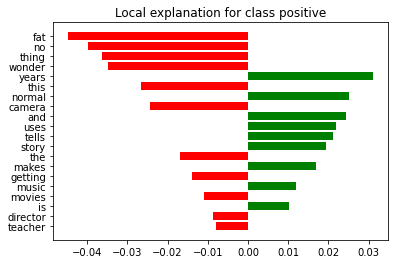

In [ ]:
exp = explainer.explain_instance(noisy , c.predict_proba, num_features=20)
print('Probability =', c.predict_proba([noisy]))
exp.as_list()
%matplotlib inline
fig = exp.as_pyplot_figure()
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

# Plot VAE result


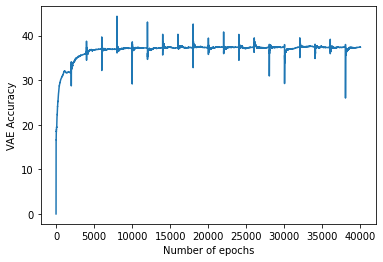

44.35


In [ ]:
import matplotlib.pyplot as plt
f = open("/content/drive/MyDrive/MLprj/AE-3.out", "r")
lines = f.read().split("decoded_mean_accuracy: ")
acc = []
index = []
for i in range(1, 40000):
      acc.append(float(lines[i].split(" - ")[0])*100)
      index.append(i)
      
plt.plot(index, acc)
plt.xlabel("Number of epochs")
plt.ylabel("VAE Accuracy")
plt.show()
print(max(acc))